# Наглядный пример Градиентного спуска

Принцип **Градиентного спуска**

$$
\Large w_{старое} = w_{новое} * -\alpha\nabla ошибка
$$

, где $\alpha$ - это размер шага.

### Импорты библиотек

In [28]:
import numpy as np
import matplotlib.pyplot as plt

### Утилитарные определения

В следующем блоке идут технические определения не требующие глубокого понимания

In [8]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

def plt_center():
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

### Описание функции ошибка

Предположим, функция ошибки, это:

$$
f(x) = x^4 - 3x^3 + 2
$$

Ниже её определение через програмный код.

In [9]:
# Оператор "**" - это возведение в степень
# def от слова "define" - "определить"

def f(x):
   return x ** 4 - 3 * x ** 3 + 2

### Выводим график функции

В нижеследующий блок кода можно не углубляться, главное рассмотреть сам график.

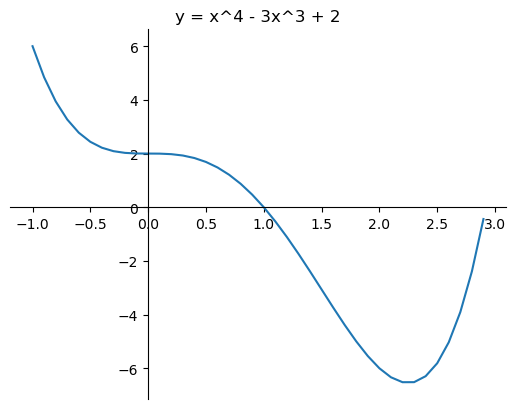

In [10]:
x = np.arange(-1, 3, 0.1)
y = f(x)
plt.plot(x, y)
plt.title("y = x^4 - 3x^3 + 2")
plt_center()
plt.show()

Очевидно, что минимум находится в районе точки $(2.4, -6)$, для нахождения точного минимума нам потредуется производная.

$$
f'(x) = 4x^3 - 9x^2
$$

Ниже её определение через програмный код.

In [11]:
def df(x):
   return 4 * x ** 3 - 9 * x ** 2

### Выводим график функции

В нижеследующий блок кода можно не углубляться, главное рассмотреть сам график.

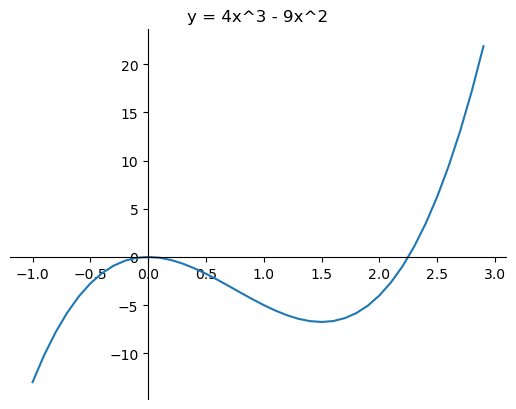

In [12]:
x = np.arange(-1, 3, 0.1)
y = df(x)
plt.plot(x, y)
plt.title("y = 4x^3 - 9x^2")
plt_center()
plt.show()

Точка, где производная пересекает ноль, и есть та самая точка,
где первообразная имеет минимальное значение в смысле кармашка - иначе - *локальный минимум*.
Очевидно, что минимальный $y$ находится в $-\infty$, но нас интересуют именно кармашки.

> На практике функции ошибки не пересекают $y = 0$ в сторону отрицательных значений,
> и *глобальный минимум* функции всегда выше оси $x$ и самый к ней близкий

Этот минимум можно найти аналитически приравняв производную к нулю:

1. $4x^3 - 9x^2 = 0$
2. $4x^3 = 9x^2$
3. $\Large \frac{4x^3}{x^2} = \frac{9x^2}{x^2}$
4. $4x = 9$
5. $x = 9 / 4 = 2.25$

> В случае машинного обучения функция ошибки является матричной, её производная так же является матричной функцией.
> Аналитическое решение матричного уравнения дороже чем **Градиентный спуск**

Соответственно, мы используем метод **Градиентного спуска**

Ссылки с ответом на вопрос, *почему нельзя решать задачу поиска матрицы весов аналитически?*:

* [Раз](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent)
* [Два](https://stats.stackexchange.com/questions/213271/why-is-optimisation-solved-with-gradient-descent-rather-than-with-an-analytical)

Ниже описание алгоритма нахождения минимума первообразной функции методом **Градиентного спуска**.

In [40]:
x_old = 1         # Старый x
x_new = 4         # Новый x
gamma = 0.01      # Альфа
precision = 0.001 # Точность
count = 0         # Счётчик количества шагов
coords = []       # массив координат найденных точек для визуализации отрывка пройденного алгоритмом

# Выводим заголовок таблицы
print("Прошлый x\tНовый x\t\tПрошлый y\tРазница")

# Вращаемся в цикле, пока разница между старым и новым x достаточно велика
# Пока эта разница велика - окрестности точки достаточно обширные
# Необходимо уменьшить окрестности точки до нужных границ, установленных переменной precision
while abs(x_new - x_old) > precision:
    # Запоминаем старый x
    x_old = x_new
    # Находим значение производной в заданной точке
    y = df(x_old)
    # Основной шаг градиентного спуска
    x_new += -gamma * y
    # Выводим результаты шага
    print("{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(x_old, x_new, y, x_new - x_old))
    # Сохраняем координаты найденной точки для будущей визуализации
    coords.append([x_new, y])
    # Увеличиваем счётчик шагов
    count += 1

# Выводим результаты
print("Локальный минимум находится на {:.2f}, шагов {}".format(x_new, count))

Прошлый x	Новый x		Прошлый y	Разница
4.00		2.88		112.00		-1.12
2.88		2.67		20.90		-0.21
2.67		2.55		12.01		-0.12
2.55		2.47		7.83		-0.08
2.47		2.42		5.44		-0.05
2.42		2.38		3.93		-0.04
2.38		2.35		2.92		-0.03
2.35		2.33		2.20		-0.02
2.33		2.31		1.68		-0.02
2.31		2.30		1.30		-0.01
2.30		2.29		1.01		-0.01
2.29		2.28		0.79		-0.01
2.28		2.27		0.62		-0.01
2.27		2.27		0.49		-0.00
2.27		2.26		0.39		-0.00
2.26		2.26		0.31		-0.00
2.26		2.26		0.24		-0.00
2.26		2.26		0.19		-0.00
2.26		2.26		0.15		-0.00
2.26		2.25		0.12		-0.00
2.25		2.25		0.10		-0.00
Локальный минимум находится на 2.25, шагов 21


### Визуализация шагов Градиентного спуска

Ниже мы визуализируем путь пройденный **Градиентным спуском** по линии функции.
Алгоритм двигался в основном справа налево, хотя мог и прыгать слева на право.
Путь был пройден по правой ветке кривой $f'(x) = 4x^3 - 9x^2$.
Обратите внимание на разницу в масштабе.

В нижеследующий блок кода можно не углубляться, главное рассмотреть сам график.

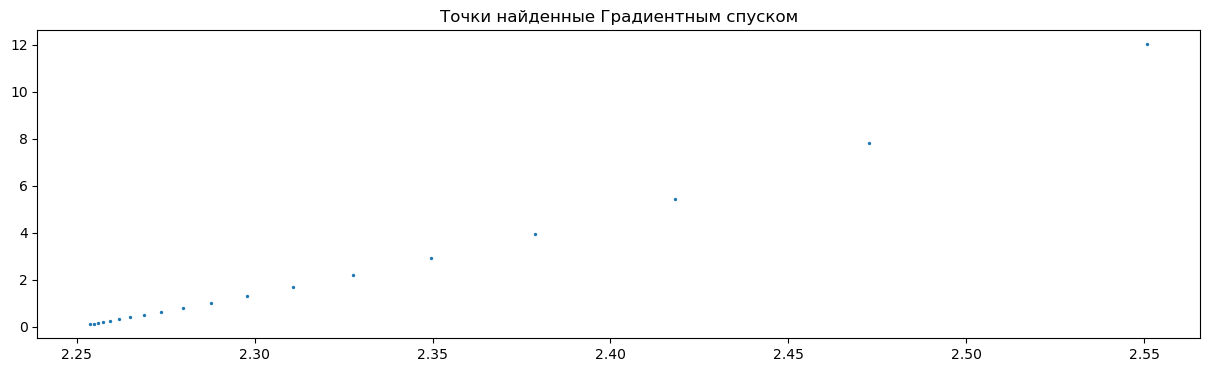

In [46]:
grad = np.array(coords)
grad = grad[grad[:, 0].argsort()]
plt.figure(figsize=(15, 4))
plt.scatter(grad[:-2,0], grad[:-2,1], s=2)
plt.title("Точки найденные Градиентным спуском")
plt.show()